In [1]:
import pandas as pd
import numpy as np

# 시각화
import seaborn as sns 
import matplotlib as mpl
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 통계검정
import scipy.stats as stats

#  분류 모델
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

# 분포
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score, roc_curve

# 결측치처리
from sklearn.impute import SimpleImputer
#스케일링
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
# 라벨인코더
from sklearn.preprocessing import LabelEncoder




/var/folders/m3/5c3zp5d91518bml26ndk894w0000gn/T/ipykernel_9160/4274691024.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## 파일 불러오기 및 합치기

In [103]:
# 고객데이터
df=pd.read_csv('member_data.csv')
df

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member
0,1000012800,정상회원,수지구-풍덕천동,여,58.0,미신청,.,normal
1,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal
2,1000122304,정상회원,광주-기타,여,38.0,미신청,.,normal
3,1000163136,정상회원,수지구-동천동,여,73.0,미신청,.,normal
4,1000281920,정상회원,수지구-풍덕천동,여,42.0,신청,.,normal
...,...,...,...,...,...,...,...,...
11550,999682432,탈퇴,수지구-동천동,여,47.0,미신청,.,normal
11551,999721408,정상회원,수지구-동천동,여,43.0,미신청,.,normal
11552,999738112,정상회원,수지구-성복동,여,67.0,미신청,.,normal
11553,999754816,정상회원,수지구-상현동,여,44.0,신청,.,normal


In [104]:
# 판매데이터
df1=pd.read_csv('product_data_001.csv')
df2=pd.read_csv('product_data_002.csv')
df3=pd.read_csv('product_data_003.csv')
df4=pd.read_csv('product_data_004.csv')

In [105]:
result= pd.concat([df1,df2,df3,df4], join='inner')
result

,공급일자,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,구매시각
0,2022-01-01,272369856,정상회원,과실,과일,사과,사과/유(1.5kg),1.0,22207,매장C,NaN,10:04
1,2022-01-01,1476143616,정상회원,간식,빵,"식빵, 식사대용",아침빵(240g/8개)/매장,1.0,4403,매장C,NaN,10:09
2,2022-01-01,743192512,정상회원,채소,양념채소,생강,생강(300g),1.0,7083,매장C,NaN,10:12
3,2022-01-01,176912064,정상회원,축산물,유제품,우유/산양유,유기농저지방우유(종이팩/900ml),1.0,7849,매장C,NaN,10:23
4,2022-01-01,87592064,정상회원,양념/가루,가루,양념가루,카레(매운맛: 100g),3.0,15507,매장C,NaN,10:29
...,...,...,...,...,...,...,...,...,...,...,...,...
52565,2022-10-30,1110819712,정상회원,채소,뿌리채소,무,무(0.7~1kg미만),1.0,2680,매장A,NaN,13:26
52566,2022-10-30,1517953728,정상회원,채소,양념채소,쪽파,쪽파(500g),1.0,4212,매장A,NaN,10:58
52567,2022-10-30,713691392,정상회원,반찬,밑반찬,조림,우엉조림(반찬용/150g),1.0,7658,매장A,NaN,14:36
52568,2022-10-30,247926336,정상회원,간식,빵,건강곡물빵,감자바게트(180g)/매장,1.0,5169,매장A,NaN,16:23


## 고객데이터+판매데이터

In [106]:
# 판매데이터와 고객데이터를 회원번호를 기준으로 결합
dff = pd.merge(df, result, on=['회원번호','조합원상태'], how='left')
dff

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,공급일자,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,구매시각
0,1000012800,정상회원,수지구-풍덕천동,여,58.0,미신청,.,normal,2022-06-13,반찬,두부/유부,두부,두부(1모:420g),2.0,7658,매장B,NaN,16:11
1,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,식사대용,식사대용/기타,닭고기볶음밥(300g),1.0,5743,매장C,NaN,13:27
2,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,식사대용,식사대용/기타,채소볶음밥(300g),1.0,4786,매장C,NaN,13:27
3,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,과자,스낵,하늘바다새우(60g),2.0,7083,매장C,NaN,13:27
4,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,과자,스낵,우리밀곡물와플(80g),1.0,3829,매장C,NaN,13:27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294640,99995712,정상회원,수지구-상현동,여,66.0,미신청,.,normal,2022-10-08,축산물,꿀,꿀,아카시아꿀(460g),1.0,27759,매장B,NaN,13:29
294641,99995712,정상회원,수지구-상현동,여,66.0,미신청,.,normal,2022-10-16,서류,고구마,고구마,밤고구마(1kg),1.0,6700,매장B,NaN,17:45
294642,99995712,정상회원,수지구-상현동,여,66.0,미신청,.,normal,2022-10-24,간식,빵,앙금크림빵,커스터드큐브빵(135g)/매장,1.0,5360,매장B,NaN,10:06
294643,99995712,정상회원,수지구-상현동,여,66.0,미신청,.,normal,2022-10-24,채소,양념채소,중파,중파(500g),1.0,4212,매장B,NaN,10:06


### 데이터 추출

In [107]:
df5=dff[(dff['배송서비스신청여부']=='미신청')&(dff['연령']>=30)&(dff['연령']<70)]

In [108]:
df5

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,공급일자,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,구매시각
0,1000012800,정상회원,수지구-풍덕천동,여,58.0,미신청,.,normal,2022-06-13,반찬,두부/유부,두부,두부(1모:420g),2.0,7658,매장B,NaN,16:11
1,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,식사대용,식사대용/기타,닭고기볶음밥(300g),1.0,5743,매장C,NaN,13:27
2,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,식사대용,식사대용/기타,채소볶음밥(300g),1.0,4786,매장C,NaN,13:27
3,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,과자,스낵,하늘바다새우(60g),2.0,7083,매장C,NaN,13:27
4,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,과자,스낵,우리밀곡물와플(80g),1.0,3829,매장C,NaN,13:27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294640,99995712,정상회원,수지구-상현동,여,66.0,미신청,.,normal,2022-10-08,축산물,꿀,꿀,아카시아꿀(460g),1.0,27759,매장B,NaN,13:29
294641,99995712,정상회원,수지구-상현동,여,66.0,미신청,.,normal,2022-10-16,서류,고구마,고구마,밤고구마(1kg),1.0,6700,매장B,NaN,17:45
294642,99995712,정상회원,수지구-상현동,여,66.0,미신청,.,normal,2022-10-24,간식,빵,앙금크림빵,커스터드큐브빵(135g)/매장,1.0,5360,매장B,NaN,10:06
294643,99995712,정상회원,수지구-상현동,여,66.0,미신청,.,normal,2022-10-24,채소,양념채소,중파,중파(500g),1.0,4212,매장B,NaN,10:06


- 고객데이터: df
- 판매데이터: result(각각의 데이터는 df1~df4)
- 전체 데이터 머지: dff
- 연령/배송서비스신청여부: df5

## 시간대별 eda

/var/folders/m3/5c3zp5d91518bml26ndk894w0000gn/T/ipykernel_9160/3686341651.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  result['구매시각'] = pd.to_datetime(result['구매시각'])  # 시간 형식으로 변환


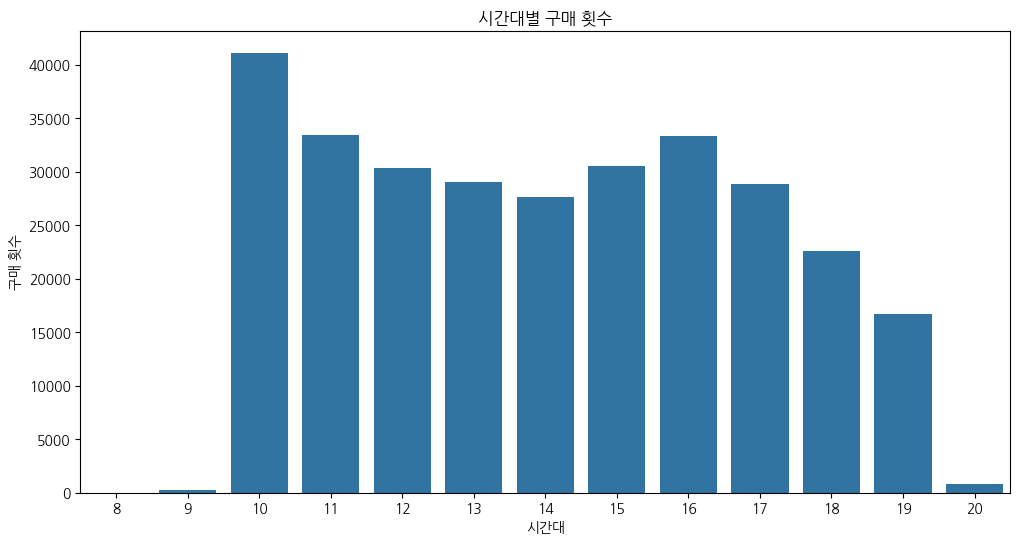

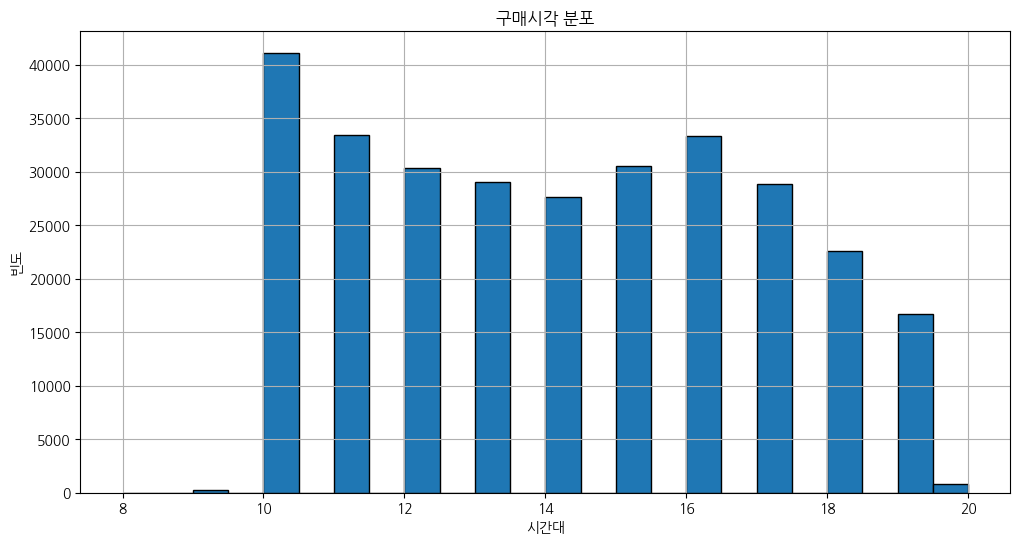

In [8]:
# '구매시각' 칼럼의 시계열 그래프
result['구매시각'] = pd.to_datetime(result['구매시각'])  # 시간 형식으로 변환
result['Hour'] = result['구매시각'].dt.hour  # 시간대를 추출하여 새로운 칼럼 생성

# 시간대별 구매 횟수 시각화
plt.figure(figsize=(12, 6))
sns.countplot(x='Hour', data=result)
plt.title('시간대별 구매 횟수')
plt.xlabel('시간대')
plt.ylabel('구매 횟수')
plt.show()

# '구매시각' 칼럼의 히스토그램
plt.figure(figsize=(12, 6))
result['Hour'].hist(bins=24, edgecolor='black')
plt.title('구매시각 분포')
plt.xlabel('시간대')
plt.ylabel('빈도')
plt.show()

## 연령 분포 eda

In [109]:
a=df[df['성별']=='여']

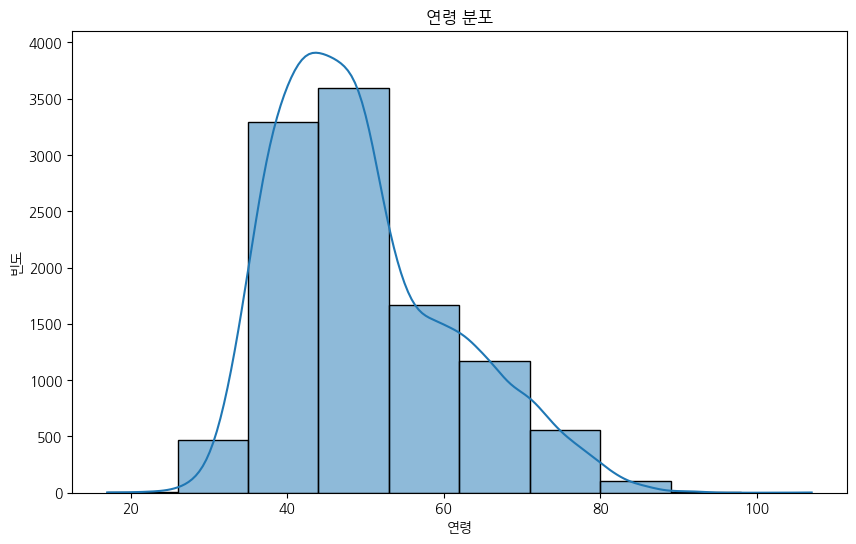

In [110]:
plt.figure(figsize=(10, 6))
sns.histplot(a['연령'], bins=10, kde=True)
plt.title('연령 분포')
plt.xlabel('연령')
plt.ylabel('빈도')
plt.show()

## 전체 대비 30~60 구매금액 퍼센트 EDA

In [11]:
dff1=dff

In [12]:
dff1['연령대']=dff1['연령'].apply(lambda x: '30~60대' if (x>=30)&(x<70) else '기타 연령대')

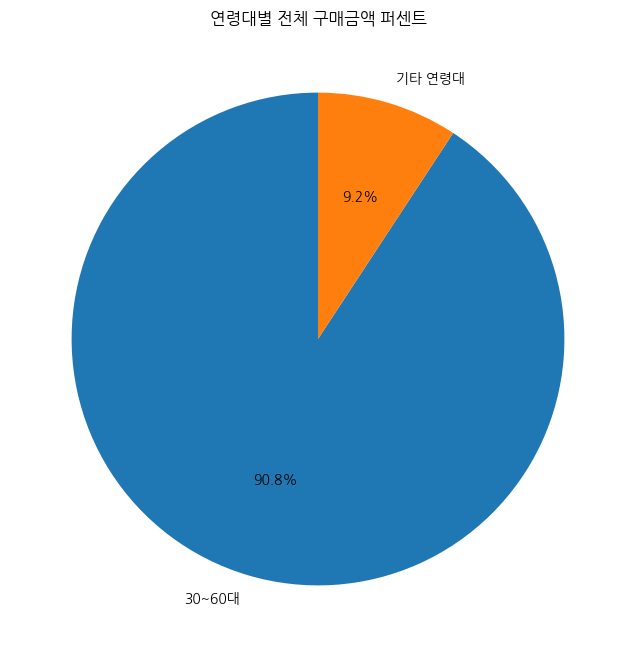

In [13]:
# 전체 구매금액 계산
total_purchase = dff1['구매금액'].sum()

# 연령대별 구매금액 퍼센트 계산
purchase_percentage = dff1.groupby('연령대')['구매금액'].sum() / total_purchase * 100

# 파이차트 그리기
plt.figure(figsize=(8, 8))
plt.pie(purchase_percentage, labels=purchase_percentage.index, autopct='%1.1f%%', startangle=90)
plt.title('연령대별 전체 구매금액 퍼센트')
plt.show()


## 구매금액 합에 따라 정렬(+성별)

In [14]:
# pivot_table 생성 후 구매금액 기준으로 내림차순 정렬
pivot_table_result = dff.pivot_table(index='회원번호', values='구매금액', aggfunc='sum')
sorted_pivot_table = pivot_table_result.sort_values(by='구매금액', ascending=False)

# 회원번호에 대해 성별을 추출
gender_by_member = dff[['회원번호', '성별']].drop_duplicates().set_index('회원번호')

# 결과 출력
final_result = sorted_pivot_table.join(gender_by_member)
final_result

,구매금액,성별
회원번호,,
1670400000,13060734,남
436681536,9559980,여
381879424,9002241,여
193003584,6327044,여
762476352,5672698,여
...,...,...
18764160,-88827,여
459849984,-102612,여
399893760,-104526,남


## 물품 대/중/소 분류 개수

In [15]:
dff['물품대분류'].describe()

count     294645
unique        16
top           채소
freq       75965
Name: 물품대분류, dtype: object

In [16]:
dff['물품중분류'].describe()

count     294645
unique        64
top        두부/유부
freq       21028
Name: 물품중분류, dtype: object

In [17]:
dff['물품소분류'].describe()

count     294645
unique       391
top           두부
freq       18793
Name: 물품소분류, dtype: object

## 지역

In [18]:
dff.pivot_table(index='구매매장', columns='주소',values='회원번호', aggfunc='count')

주소,광주-기타,광주-산성동,광주-오포읍,기타-궁내동,기타-금곡동,기타-금광동,기타-기타,기타-동백동,기타-동천동,기타-보라동,...,처인구-모현면,처인구-삼가동,처인구-역북동,처인구-원삼면,처인구-유방동,처인구-이동면,하남-기타,하남-위례동,화성-기타,화성-보라동
구매매장,,,,,,,,,,,,,,,,,,,,,
매장A,71.0,1.0,124.0,NaN,NaN,2.0,2101.0,NaN,NaN,NaN,...,17.0,3.0,52.0,3.0,NaN,2.0,46.0,NaN,121.0,NaN
매장B,161.0,1.0,60.0,NaN,NaN,NaN,1850.0,12.0,4.0,4.0,...,72.0,5.0,9.0,1.0,24.0,NaN,10.0,NaN,164.0,NaN
매장C,125.0,1.0,39.0,NaN,NaN,4.0,4362.0,NaN,NaN,78.0,...,33.0,3.0,30.0,19.0,37.0,NaN,55.0,2.0,270.0,8.0
매장D,62.0,1.0,15.0,3.0,10.0,NaN,2043.0,NaN,NaN,NaN,...,NaN,5.0,NaN,NaN,NaN,NaN,12.0,NaN,65.0,2.0


In [19]:
a=dff[dff['구매매장']=='매장A']
a.pivot_table(index='주소', columns='구매매장',values='회원번호', aggfunc='count').sort_values(by='매장A',ascending=False).head(10)

구매매장,매장A
주소,
수지구-동천동,28727
수지구-풍덕천동,9022
기타-기타,2101
수지구-기타,2022
수지구-신봉동,1224
수지구-성복동,1168
수지구-상현동,997
수지구-죽전동,701
서울 강남구-기타,554


In [20]:
b=dff[dff['구매매장']=='매장B']
b.pivot_table(index='주소', columns='구매매장',values='회원번호', aggfunc='count').sort_values(by='매장B',ascending=False).head(10)

구매매장,매장B
주소,
수지구-상현동,34276
수지구-풍덕천동,12287
기흥구-보정동,4401
수지구-성복동,4144
기타-기타,1850
수원 영통구-기타,857
수지구-신봉동,674
수지구-죽전동,660
기타-비조합원,441


In [21]:
c=dff[dff['구매매장']=='매장C']
c.pivot_table(index='주소', columns='구매매장',values='회원번호', aggfunc='count').sort_values(by='매장C',ascending=False).head(10)

구매매장,매장C
주소,
수지구-풍덕천동,83625
수지구-성복동,9455
수지구-상현동,6369
수지구-신봉동,6121
기타-기타,4362
수지구-동천동,1466
수지구-죽전동,1183
분당구-정자동,1110
수원 영통구-기타,940


In [22]:
d=dff[dff['구매매장']=='매장D']
d.pivot_table(index='주소', columns='구매매장',values='회원번호', aggfunc='count').sort_values(by='매장D',ascending=False).head(10)

구매매장,매장D
주소,
수지구-신봉동,37104
수지구-성복동,8104
기타-기타,2043
수지구-풍덕천동,1644
수지구-상현동,1381
수원 영통구-기타,675
수지구-기타,577
수지구-동천동,379
서울 강남구-기타,352


## 배송

### 고령이 몇살인지

In [23]:
a= dff[dff['배송서비스신청여부']=='신청']

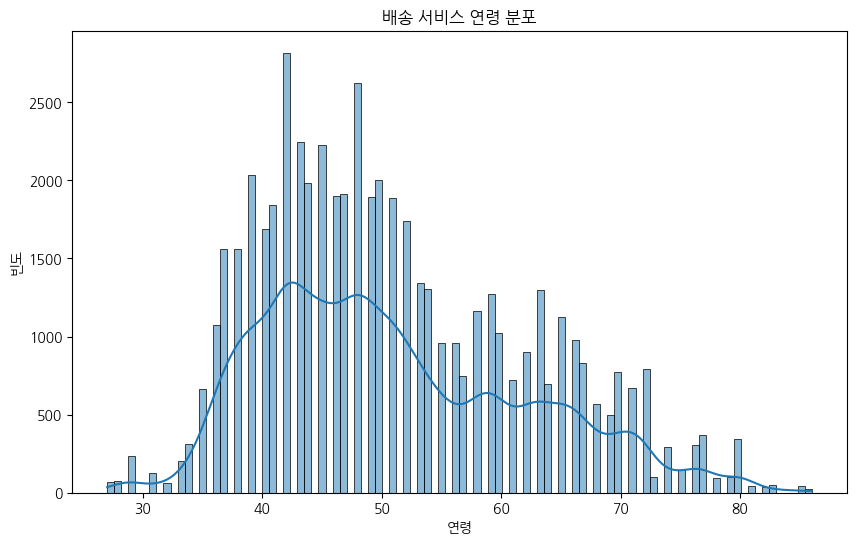

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(a['연령'], bins=100, kde=True)
plt.title('배송 서비스 연령 분포')
plt.xlabel('연령')
plt.ylabel('빈도')
plt.show()

In [25]:
a

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,공급일자,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,구매시각,연령대
37,1000281920,정상회원,수지구-풍덕천동,여,42.0,신청,.,normal,2022-01-01,반찬,두부/유부,두부,두부(반모:270g),1.0,2872,매장C,NaN,14:09,30~60대
38,1000281920,정상회원,수지구-풍덕천동,여,42.0,신청,.,normal,2022-01-04,생활용품,화장품,세안제/팩,자연그대로 거품세안제,-1.0,-28716,매장C,2022-01-05,16:19,30~60대
39,1000281920,정상회원,수지구-풍덕천동,여,42.0,신청,.,normal,2022-01-04,간식,떡,가래떡,떡국떡(유기:800g),-1.0,-11295,매장C,2022-01-05,16:19,30~60대
40,1000281920,정상회원,수지구-풍덕천동,여,42.0,신청,.,normal,2022-01-04,서류,감자,감자,감자(1kg),1.0,5743,매장C,NaN,16:17,30~60대
41,1000281920,정상회원,수지구-풍덕천동,여,42.0,신청,.,normal,2022-01-11,채소,버섯,목이버섯,목이버섯(200g),1.0,6318,매장C,NaN,10:31,30~60대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294550,999754816,정상회원,수지구-상현동,여,44.0,신청,.,normal,2022-09-19,간식,잼/병조림/기타,잼,딸기잼(480g),4.0,52838,매장B,NaN,19:30,30~60대
294551,999754816,정상회원,수지구-상현동,여,44.0,신청,.,normal,2022-10-05,수산,냉동수산,냉동패류,냉동굴(350g),1.0,8806,매장B,NaN,14:33,30~60대
294552,999754816,정상회원,수지구-상현동,여,44.0,신청,.,normal,2022-10-10,채소,쌈채소류,상추,상추(200g),1.0,2680,매장B,NaN,18:40,30~60대
294553,999754816,정상회원,수지구-상현동,여,44.0,신청,.,normal,2022-10-21,축산물,알,유정란,유정란/매장용(15알/국내산),1.0,10338,매장B,NaN,18:22,30~60대


In [26]:
a['회원번호'].nunique()

1043

In [27]:
# '구매시각' 칼럼의 시계열 그래프
dff['구매시각'] = pd.to_datetime(dff['구매시각'])  # 시간 형식으로 변환
dff['Hour'] = dff['구매시각'].dt.hour  # 시간대를 추출하여 새로운 칼럼 생성

/var/folders/m3/5c3zp5d91518bml26ndk894w0000gn/T/ipykernel_9160/4232494554.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dff['구매시각'] = pd.to_datetime(dff['구매시각'])  # 시간 형식으로 변환


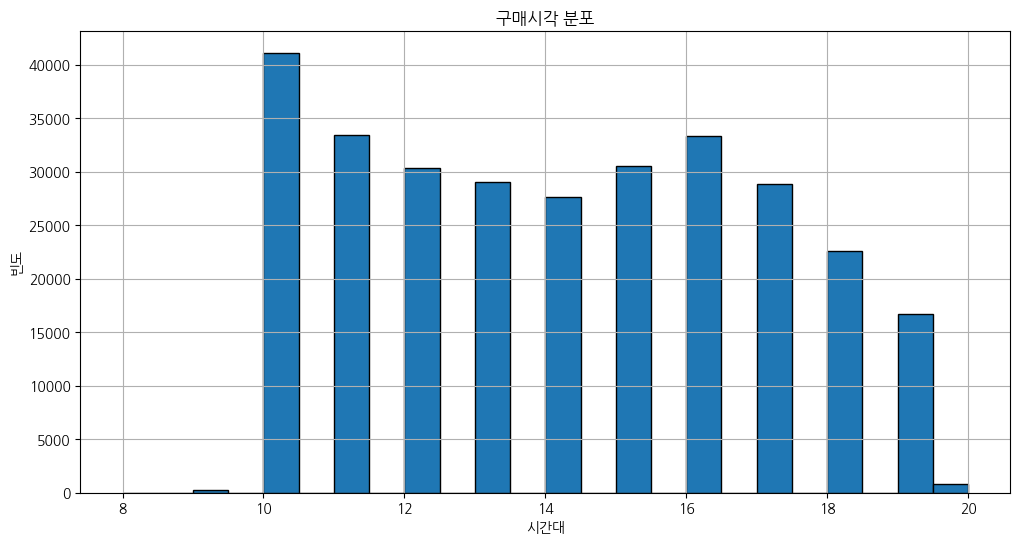

In [28]:
# '구매시각' 칼럼의 히스토그램
plt.figure(figsize=(12, 6))
dff['Hour'].hist(bins=24, edgecolor='black')
plt.title('구매시각 분포')
plt.xlabel('시간대')
plt.ylabel('빈도')
plt.show()

In [29]:
# '구매시각' 칼럼의 히스토그램
plt.figure(figsize=(12, 6))
a['Hour'].hist(bins=24, edgecolor='black')
plt.title('구매시각 분포')
plt.xlabel('시간대')
plt.ylabel('빈도')
plt.show()

KeyError: 'Hour'

<Figure size 1200x600 with 0 Axes>

# 1. 예상판매시점  

**1) 예상판매시점  
(팝업을 띄운다)**

> 예상판매시점이 하나의 시간인지, n개의 시간인지
시간인지 분인지 날짜인지.
week에 대한 분석,, 아침 몇시에 대한 예측,, 예측 시점 ,,? 에측 시점을 제대로 정해야함 당장 1시간 뒤 예측 필요없음
y값이 시간대보다는 주말오전 등 카테고리컬해야 좋음.
단 예측이 잘 안나올 수 있음.
랜덤포레스트 ㄱㄱ
평일 오전(12시 이전) / 평일 오후(1: 12~3) 평일 오후(2: 3~6) / 평일 저녁(6시 이후) / 주말 오전 / 주말 오후
> 

예상 판매 시간에 알림 효과 ★ (신규고객 - 분류)

**y 시간     x 구매금액 / VIP여부 / 주소 / 연령 / 중분류 / 반품신청여부/ 성별**

factor를 고른 이유 적을 것 , 중분류(라벨인코더), 어떤 피쳐가 유의미한가, 왠만하면 다 때려박기

1. 재구매 알림 서비스
    1. 고객의 이전 구매 패턴을 분석하여 특정 상품의 재구매 주기를 예측, 재구매 시기가 다가왔을 때 고객에게 알림을 보내는 기능 제공

### '구매시점' 파생변수 생성 및 df5 정리

In [111]:
df5['공급일자'] = pd.to_datetime(df5['공급일자'])

/var/folders/m3/5c3zp5d91518bml26ndk894w0000gn/T/ipykernel_9160/56213017.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['공급일자'] = pd.to_datetime(df5['공급일자'])


In [112]:
df5['요일']=df5['공급일자'].dt.weekday
df5.head(10)

/var/folders/m3/5c3zp5d91518bml26ndk894w0000gn/T/ipykernel_9160/2686644170.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['요일']=df5['공급일자'].dt.weekday


,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,공급일자,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,구매시각,요일
0,1000012800,정상회원,수지구-풍덕천동,여,58.0,미신청,.,normal,2022-06-13,반찬,두부/유부,두부,두부(1모:420g),2.0,7658,매장B,NaN,16:11,0
1,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,식사대용,식사대용/기타,닭고기볶음밥(300g),1.0,5743,매장C,NaN,13:27,2
2,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,식사대용,식사대용/기타,채소볶음밥(300g),1.0,4786,매장C,NaN,13:27,2
3,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,과자,스낵,하늘바다새우(60g),2.0,7083,매장C,NaN,13:27,2
4,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,과자,스낵,우리밀곡물와플(80g),1.0,3829,매장C,NaN,13:27,2
5,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,식사대용,식사대용/기타,소불고기볶음밥(300g),1.0,9381,매장C,NaN,13:27,2
6,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,과자,스낵,7곡딸기롤과자(100g/10개입),1.0,6126,매장C,NaN,13:27,2
7,1000122304,정상회원,광주-기타,여,38.0,미신청,.,normal,2022-08-24,채소,버섯,팽이버섯,팽이버섯(150g),1.0,1149,매장C,NaN,16:39,2
8,1000122304,정상회원,광주-기타,여,38.0,미신청,.,normal,2022-08-24,채소,버섯,만가닥버섯,갈색만가닥버섯(150g),1.0,2967,매장C,NaN,16:39,2
9,1000122304,정상회원,광주-기타,여,38.0,미신청,.,normal,2022-08-26,채소,열매채소,피망,피망(3개/210g이상),1.0,3829,매장C,NaN,17:16,4


In [113]:
df5['a'] = pd.to_datetime(df5['구매시각'])

/var/folders/m3/5c3zp5d91518bml26ndk894w0000gn/T/ipykernel_9160/2692583105.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df5['a'] = pd.to_datetime(df5['구매시각'])
/var/folders/m3/5c3zp5d91518bml26ndk894w0000gn/T/ipykernel_9160/2692583105.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['a'] = pd.to_datetime(df5['구매시각'])


In [114]:
df5['성별'].value_counts()

성별
여    205445
남     12323
Name: count, dtype: int64

In [115]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 217769 entries, 0 to 294644
Data columns (total 20 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   회원번호         217769 non-null  int64         
 1   조합원상태        217769 non-null  object        
 2   주소           217769 non-null  object        
 3   성별           217768 non-null  object        
 4   연령           217769 non-null  float64       
 5   배송서비스신청여부    217769 non-null  object        
 6   모바일알람여부      217769 non-null  object        
 7   Gold_member  217769 non-null  object        
 8   공급일자         217769 non-null  datetime64[ns]
 9   물품대분류        217769 non-null  object        
 10  물품중분류        217769 non-null  object        
 11  물품소분류        217769 non-null  object        
 12  물품명          217769 non-null  object        
 13  구매수량         217769 non-null  float64       
 14  구매금액         217769 non-null  int64         
 15  구매매장         217769 non-null  object   

In [116]:
df5['시각'] = df5['a'].dt.hour  # 시간대를 추출하여 새로운 칼럼 생성
df5.head(10)

/var/folders/m3/5c3zp5d91518bml26ndk894w0000gn/T/ipykernel_9160/2375194472.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['시각'] = df5['a'].dt.hour  # 시간대를 추출하여 새로운 칼럼 생성


,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,공급일자,물품대분류,...,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,구매시각,요일,a,시각
0,1000012800,정상회원,수지구-풍덕천동,여,58.0,미신청,.,normal,2022-06-13,반찬,...,두부,두부(1모:420g),2.0,7658,매장B,NaN,16:11,0,2024-02-14 16:11:00,16
1,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,...,식사대용/기타,닭고기볶음밥(300g),1.0,5743,매장C,NaN,13:27,2,2024-02-14 13:27:00,13
2,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,...,식사대용/기타,채소볶음밥(300g),1.0,4786,매장C,NaN,13:27,2,2024-02-14 13:27:00,13
3,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,...,스낵,하늘바다새우(60g),2.0,7083,매장C,NaN,13:27,2,2024-02-14 13:27:00,13
4,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,...,스낵,우리밀곡물와플(80g),1.0,3829,매장C,NaN,13:27,2,2024-02-14 13:27:00,13
5,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,...,식사대용/기타,소불고기볶음밥(300g),1.0,9381,매장C,NaN,13:27,2,2024-02-14 13:27:00,13
6,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,...,스낵,7곡딸기롤과자(100g/10개입),1.0,6126,매장C,NaN,13:27,2,2024-02-14 13:27:00,13
7,1000122304,정상회원,광주-기타,여,38.0,미신청,.,normal,2022-08-24,채소,...,팽이버섯,팽이버섯(150g),1.0,1149,매장C,NaN,16:39,2,2024-02-14 16:39:00,16
8,1000122304,정상회원,광주-기타,여,38.0,미신청,.,normal,2022-08-24,채소,...,만가닥버섯,갈색만가닥버섯(150g),1.0,2967,매장C,NaN,16:39,2,2024-02-14 16:39:00,16
9,1000122304,정상회원,광주-기타,여,38.0,미신청,.,normal,2022-08-26,채소,...,피망,피망(3개/210g이상),1.0,3829,매장C,NaN,17:16,4,2024-02-14 17:16:00,17


In [117]:
df5['주말여부'].value_counts()

KeyError: '주말여부'

In [118]:
df5['주말여부']=df5['요일'].apply(lambda x: '주말' if (x==5)|(x==6) else '평일')
df5.head(5)

/var/folders/m3/5c3zp5d91518bml26ndk894w0000gn/T/ipykernel_9160/2254470501.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['주말여부']=df5['요일'].apply(lambda x: '주말' if (x==5)|(x==6) else '평일')


,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,공급일자,물품대분류,...,물품명,구매수량,구매금액,구매매장,반품_원거래일자,구매시각,요일,a,시각,주말여부
0,1000012800,정상회원,수지구-풍덕천동,여,58.0,미신청,.,normal,2022-06-13,반찬,...,두부(1모:420g),2.0,7658,매장B,NaN,16:11,0,2024-02-14 16:11:00,16,평일
1,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,...,닭고기볶음밥(300g),1.0,5743,매장C,NaN,13:27,2,2024-02-14 13:27:00,13,평일
2,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,...,채소볶음밥(300g),1.0,4786,매장C,NaN,13:27,2,2024-02-14 13:27:00,13,평일
3,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,...,하늘바다새우(60g),2.0,7083,매장C,NaN,13:27,2,2024-02-14 13:27:00,13,평일
4,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,...,우리밀곡물와플(80g),1.0,3829,매장C,NaN,13:27,2,2024-02-14 13:27:00,13,평일


In [119]:
df5['시간대'] = df5['시각'].apply(lambda x: '오전' if (x>=9)&(x<12) else('낮1' if (x>=12)&(x<15) else ('낮2' if (x>=15)&(x<18) else '저녁')))
df5.head(5)

/var/folders/m3/5c3zp5d91518bml26ndk894w0000gn/T/ipykernel_9160/1951137633.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['시간대'] = df5['시각'].apply(lambda x: '오전' if (x>=9)&(x<12) else('낮1' if (x>=12)&(x<15) else ('낮2' if (x>=15)&(x<18) else '저녁')))


,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,공급일자,물품대분류,...,구매수량,구매금액,구매매장,반품_원거래일자,구매시각,요일,a,시각,주말여부,시간대
0,1000012800,정상회원,수지구-풍덕천동,여,58.0,미신청,.,normal,2022-06-13,반찬,...,2.0,7658,매장B,NaN,16:11,0,2024-02-14 16:11:00,16,평일,낮2
1,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,...,1.0,5743,매장C,NaN,13:27,2,2024-02-14 13:27:00,13,평일,낮1
2,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,...,1.0,4786,매장C,NaN,13:27,2,2024-02-14 13:27:00,13,평일,낮1
3,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,...,2.0,7083,매장C,NaN,13:27,2,2024-02-14 13:27:00,13,평일,낮1
4,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,...,1.0,3829,매장C,NaN,13:27,2,2024-02-14 13:27:00,13,평일,낮1


In [120]:
df5

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,공급일자,물품대분류,...,구매수량,구매금액,구매매장,반품_원거래일자,구매시각,요일,a,시각,주말여부,시간대
0,1000012800,정상회원,수지구-풍덕천동,여,58.0,미신청,.,normal,2022-06-13,반찬,...,2.0,7658,매장B,NaN,16:11,0,2024-02-14 16:11:00,16,평일,낮2
1,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,...,1.0,5743,매장C,NaN,13:27,2,2024-02-14 13:27:00,13,평일,낮1
2,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,...,1.0,4786,매장C,NaN,13:27,2,2024-02-14 13:27:00,13,평일,낮1
3,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,...,2.0,7083,매장C,NaN,13:27,2,2024-02-14 13:27:00,13,평일,낮1
4,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,...,1.0,3829,매장C,NaN,13:27,2,2024-02-14 13:27:00,13,평일,낮1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294640,99995712,정상회원,수지구-상현동,여,66.0,미신청,.,normal,2022-10-08,축산물,...,1.0,27759,매장B,NaN,13:29,5,2024-02-14 13:29:00,13,주말,낮1
294641,99995712,정상회원,수지구-상현동,여,66.0,미신청,.,normal,2022-10-16,서류,...,1.0,6700,매장B,NaN,17:45,6,2024-02-14 17:45:00,17,주말,낮2
294642,99995712,정상회원,수지구-상현동,여,66.0,미신청,.,normal,2022-10-24,간식,...,1.0,5360,매장B,NaN,10:06,0,2024-02-14 10:06:00,10,평일,오전
294643,99995712,정상회원,수지구-상현동,여,66.0,미신청,.,normal,2022-10-24,채소,...,1.0,4212,매장B,NaN,10:06,0,2024-02-14 10:06:00,10,평일,오전


In [121]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 217769 entries, 0 to 294644
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   회원번호         217769 non-null  int64         
 1   조합원상태        217769 non-null  object        
 2   주소           217769 non-null  object        
 3   성별           217768 non-null  object        
 4   연령           217769 non-null  float64       
 5   배송서비스신청여부    217769 non-null  object        
 6   모바일알람여부      217769 non-null  object        
 7   Gold_member  217769 non-null  object        
 8   공급일자         217769 non-null  datetime64[ns]
 9   물품대분류        217769 non-null  object        
 10  물품중분류        217769 non-null  object        
 11  물품소분류        217769 non-null  object        
 12  물품명          217769 non-null  object        
 13  구매수량         217769 non-null  float64       
 14  구매금액         217769 non-null  int64         
 15  구매매장         217769 non-null  object   

In [122]:
def func(x):
    if (x['주말여부'] == '평일') & (x['시간대'] == '오전') :
        return '평일오전'
    elif (x['주말여부'] == '평일') & (x['시간대'] == '낮1') :
        return '평일낮1'
    elif (x['주말여부'] == '평일') & (x['시간대'] == '낮2') :
        return '평일낮2'
    elif (x['주말여부'] == '평일') & (x['시간대'] == '저녁') :
        return '평일저녁'
    elif (x['주말여부'] == '주말') & (x['시간대'] == '오전') :
        return '주말오전'
    elif (x['주말여부'] == '주말') & (x['시간대'] == '낮1') :
        return '주말낮1'
    elif (x['주말여부'] == '주말') & (x['시간대'] == '낮2') :
        return '주말낮2'
    elif (x['주말여부'] == '주말') & (x['시간대'] == '저녁') :
        return '주말저녁'

df5['구매시점'] = df5.apply(func, axis=1)
df5.head(5)


/var/folders/m3/5c3zp5d91518bml26ndk894w0000gn/T/ipykernel_9160/4115643138.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['구매시점'] = df5.apply(func, axis=1)


,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,공급일자,물품대분류,...,구매금액,구매매장,반품_원거래일자,구매시각,요일,a,시각,주말여부,시간대,구매시점
0,1000012800,정상회원,수지구-풍덕천동,여,58.0,미신청,.,normal,2022-06-13,반찬,...,7658,매장B,NaN,16:11,0,2024-02-14 16:11:00,16,평일,낮2,평일낮2
1,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,...,5743,매장C,NaN,13:27,2,2024-02-14 13:27:00,13,평일,낮1,평일낮1
2,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,...,4786,매장C,NaN,13:27,2,2024-02-14 13:27:00,13,평일,낮1,평일낮1
3,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,...,7083,매장C,NaN,13:27,2,2024-02-14 13:27:00,13,평일,낮1,평일낮1
4,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,...,3829,매장C,NaN,13:27,2,2024-02-14 13:27:00,13,평일,낮1,평일낮1


In [123]:
del df5['a']

In [124]:
df5['반품여부'] = df5['반품_원거래일자'].notna().astype(int)
df5

/var/folders/m3/5c3zp5d91518bml26ndk894w0000gn/T/ipykernel_9160/3992580531.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['반품여부'] = df5['반품_원거래일자'].notna().astype(int)


,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,공급일자,물품대분류,...,구매금액,구매매장,반품_원거래일자,구매시각,요일,시각,주말여부,시간대,구매시점,반품여부
0,1000012800,정상회원,수지구-풍덕천동,여,58.0,미신청,.,normal,2022-06-13,반찬,...,7658,매장B,NaN,16:11,0,16,평일,낮2,평일낮2,0
1,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,...,5743,매장C,NaN,13:27,2,13,평일,낮1,평일낮1,0
2,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,...,4786,매장C,NaN,13:27,2,13,평일,낮1,평일낮1,0
3,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,...,7083,매장C,NaN,13:27,2,13,평일,낮1,평일낮1,0
4,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,...,3829,매장C,NaN,13:27,2,13,평일,낮1,평일낮1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294640,99995712,정상회원,수지구-상현동,여,66.0,미신청,.,normal,2022-10-08,축산물,...,27759,매장B,NaN,13:29,5,13,주말,낮1,주말낮1,0
294641,99995712,정상회원,수지구-상현동,여,66.0,미신청,.,normal,2022-10-16,서류,...,6700,매장B,NaN,17:45,6,17,주말,낮2,주말낮2,0
294642,99995712,정상회원,수지구-상현동,여,66.0,미신청,.,normal,2022-10-24,간식,...,5360,매장B,NaN,10:06,0,10,평일,오전,평일오전,0
294643,99995712,정상회원,수지구-상현동,여,66.0,미신청,.,normal,2022-10-24,채소,...,4212,매장B,NaN,10:06,0,10,평일,오전,평일오전,0


In [45]:
df5['주말여부'].value_counts()

주말여부
평일    152566
주말     65203
Name: count, dtype: int64

In [46]:
df5

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,공급일자,물품대분류,...,구매금액,구매매장,반품_원거래일자,구매시각,요일,시각,주말여부,시간대,구매시점,반품여부
0,1000012800,정상회원,수지구-풍덕천동,여,58.0,미신청,.,normal,2022-06-13,반찬,...,7658,매장B,NaN,16:11,0,16,평일,낮2,평일낮2,0
1,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,...,5743,매장C,NaN,13:27,2,13,평일,낮1,평일낮1,0
2,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,...,4786,매장C,NaN,13:27,2,13,평일,낮1,평일낮1,0
3,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,...,7083,매장C,NaN,13:27,2,13,평일,낮1,평일낮1,0
4,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,...,3829,매장C,NaN,13:27,2,13,평일,낮1,평일낮1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294640,99995712,정상회원,수지구-상현동,여,66.0,미신청,.,normal,2022-10-08,축산물,...,27759,매장B,NaN,13:29,5,13,주말,낮1,주말낮1,0
294641,99995712,정상회원,수지구-상현동,여,66.0,미신청,.,normal,2022-10-16,서류,...,6700,매장B,NaN,17:45,6,17,주말,낮2,주말낮2,0
294642,99995712,정상회원,수지구-상현동,여,66.0,미신청,.,normal,2022-10-24,간식,...,5360,매장B,NaN,10:06,0,10,평일,오전,평일오전,0
294643,99995712,정상회원,수지구-상현동,여,66.0,미신청,.,normal,2022-10-24,채소,...,4212,매장B,NaN,10:06,0,10,평일,오전,평일오전,0


### EDA

/var/folders/m3/5c3zp5d91518bml26ndk894w0000gn/T/ipykernel_9160/3053090790.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='성별', y='구매금액', hue='주말여부', data=df5, ci=None)


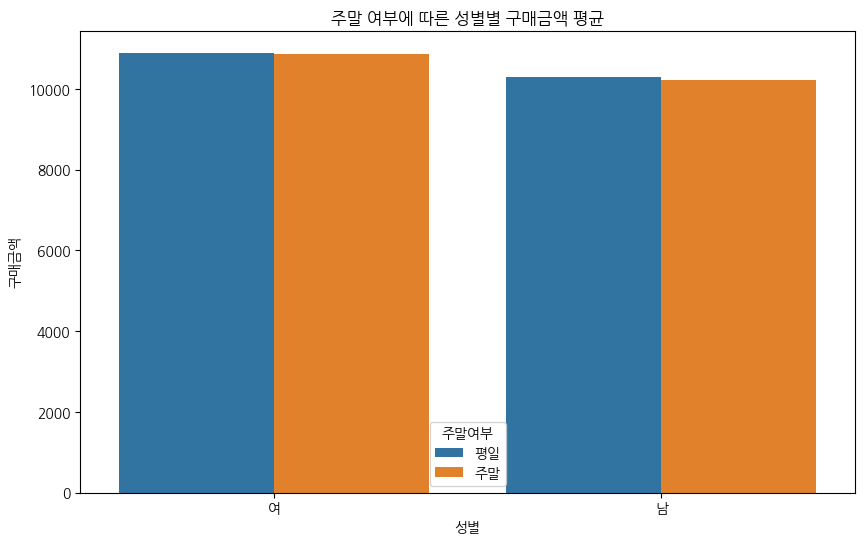

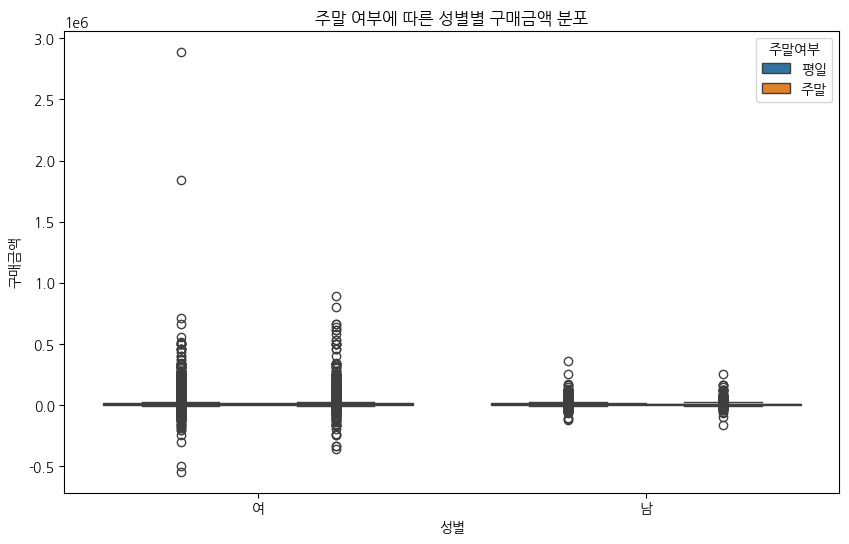

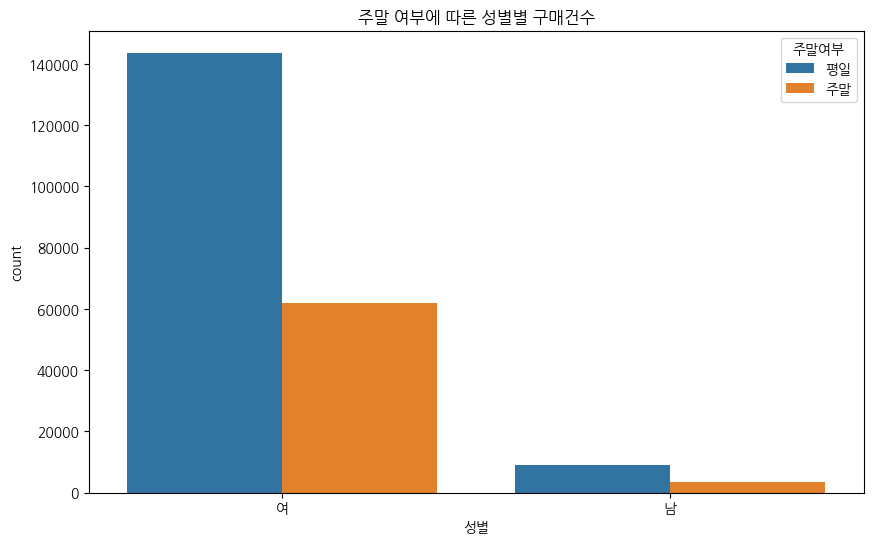

In [47]:
# 주말과 평일에 대한 데이터프레임 분리
weekend_df = df5[df5['주말여부'] == '주말']
weekday_df = df5[df5['주말여부'] == '평일']

# 주말 여부에 따른 성별별 구매금액의 평균
plt.figure(figsize=(10, 6))
sns.barplot(x='성별', y='구매금액', hue='주말여부', data=df5, ci=None)
plt.title('주말 여부에 따른 성별별 구매금액 평균')
plt.show()

# 주말 여부에 따른 성별별 구매금액의 분포
plt.figure(figsize=(10, 6))
sns.boxplot(x='성별', y='구매금액', hue='주말여부', data=df5)
plt.title('주말 여부에 따른 성별별 구매금액 분포')
plt.show()

# 주말 여부에 따른 성별별 구매건수
plt.figure(figsize=(10, 6))
sns.countplot(x='성별', hue='주말여부', data=df5)
plt.title('주말 여부에 따른 성별별 구매건수')
plt.show()

/var/folders/m3/5c3zp5d91518bml26ndk894w0000gn/T/ipykernel_9160/4031158160.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='주말여부', y='구매금액', hue='성별', data=df5, ci=None)


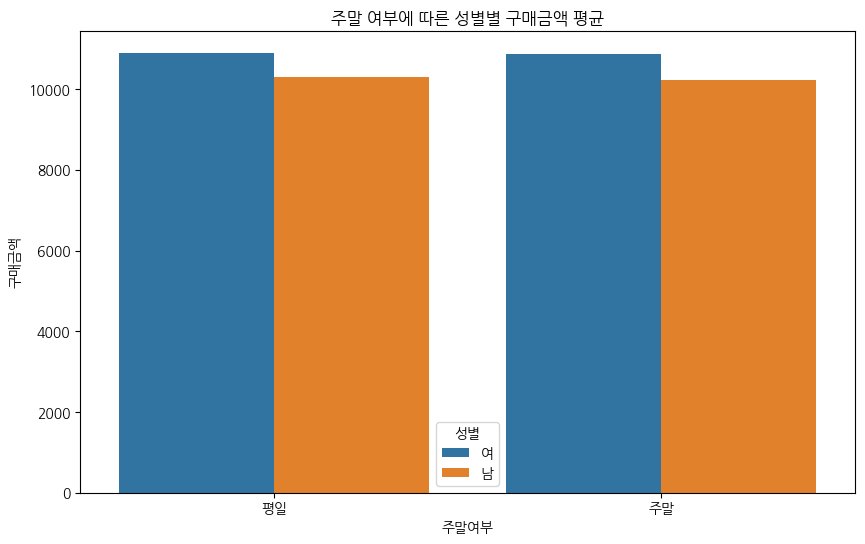

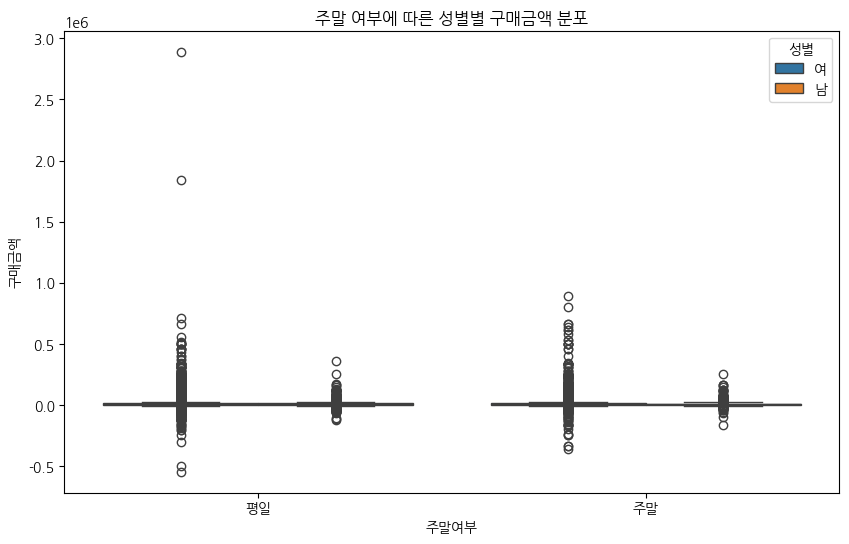

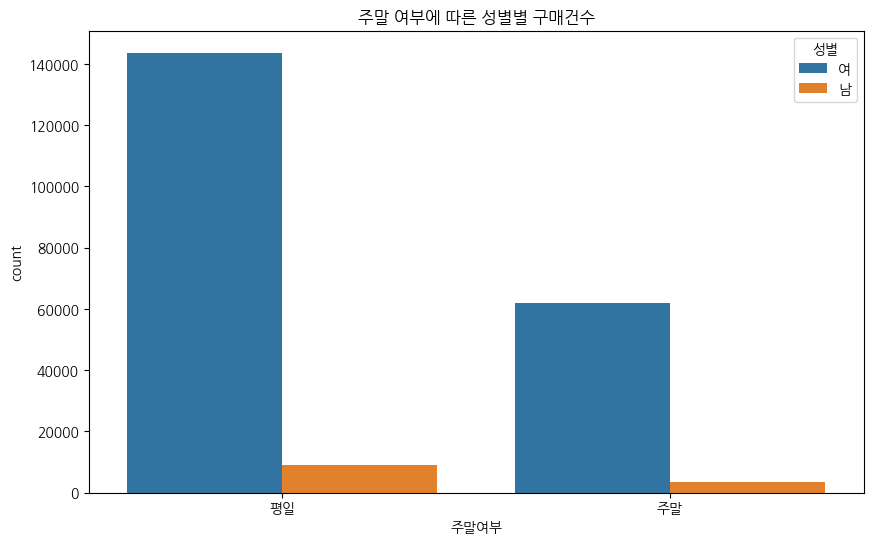

In [48]:

plt.figure(figsize=(10, 6))
sns.barplot(x='주말여부', y='구매금액', hue='성별', data=df5, ci=None)
plt.title('주말 여부에 따른 성별별 구매금액 평균')
plt.show()

# 주말 여부에 따른 성별별 구매금액의 분포
plt.figure(figsize=(10, 6))
sns.boxplot(x='주말여부', y='구매금액', hue='성별', data=df5)
plt.title('주말 여부에 따른 성별별 구매금액 분포')
plt.show()

# 주말 여부에 따른 성별별 구매건수
plt.figure(figsize=(10, 6))
sns.countplot(x='주말여부', hue='성별', data=df5)
plt.title('주말 여부에 따른 성별별 구매건수')
plt.show()


## 모바일알람여부

In [49]:
df5['모바일알람여부'] = df5['모바일알람여부'].str.replace('.', '0')
df5['모바일알람여부'] = df5['모바일알람여부'].str.replace('수신', '1')

/var/folders/m3/5c3zp5d91518bml26ndk894w0000gn/T/ipykernel_9160/3851903420.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['모바일알람여부'] = df5['모바일알람여부'].str.replace('.', '0')
/var/folders/m3/5c3zp5d91518bml26ndk894w0000gn/T/ipykernel_9160/3851903420.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['모바일알람여부'] = df5['모바일알람여부'].str.replace('수신', '1')


In [50]:

df5['모바일알람여부'] = df5['모바일알람여부'].astype(int)

/var/folders/m3/5c3zp5d91518bml26ndk894w0000gn/T/ipykernel_9160/3272518757.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['모바일알람여부'] = df5['모바일알람여부'].astype(int)


## 배송서비스

In [51]:
df5['배송서비스신청여부'] = df5['배송서비스신청여부'].str.replace('미신청', '0')
df5['배송서비스신청여부'] = df5['배송서비스신청여부'].str.replace('신청', '1')

/var/folders/m3/5c3zp5d91518bml26ndk894w0000gn/T/ipykernel_9160/1979732283.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['배송서비스신청여부'] = df5['배송서비스신청여부'].str.replace('미신청', '0')
/var/folders/m3/5c3zp5d91518bml26ndk894w0000gn/T/ipykernel_9160/1979732283.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['배송서비스신청여부'] = df5['배송서비스신청여부'].str.replace('신청', '1')


In [52]:
df5['배송서비스신청여부'] = df5['배송서비스신청여부'].astype(int)

/var/folders/m3/5c3zp5d91518bml26ndk894w0000gn/T/ipykernel_9160/3194006036.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['배송서비스신청여부'] = df5['배송서비스신청여부'].astype(int)


## smote

In [81]:
df5

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,공급일자,물품대분류,...,구매금액,구매매장,반품_원거래일자,구매시각,요일,시각,주말여부,시간대,구매시점,반품여부
0,1000012800,정상회원,수지구-풍덕천동,여,58.0,0,0,normal,2022-06-13,반찬,...,7658,매장B,NaN,16:11,0,16,평일,낮2,평일낮2,0
1,1000103744,정상회원,처인구-고림동,여,34.0,0,0,normal,2022-10-12,간식,...,5743,매장C,NaN,13:27,2,13,평일,낮1,평일낮1,0
2,1000103744,정상회원,처인구-고림동,여,34.0,0,0,normal,2022-10-12,간식,...,4786,매장C,NaN,13:27,2,13,평일,낮1,평일낮1,0
3,1000103744,정상회원,처인구-고림동,여,34.0,0,0,normal,2022-10-12,간식,...,7083,매장C,NaN,13:27,2,13,평일,낮1,평일낮1,0
4,1000103744,정상회원,처인구-고림동,여,34.0,0,0,normal,2022-10-12,간식,...,3829,매장C,NaN,13:27,2,13,평일,낮1,평일낮1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294640,99995712,정상회원,수지구-상현동,여,66.0,0,0,normal,2022-10-08,축산물,...,27759,매장B,NaN,13:29,5,13,주말,낮1,주말낮1,0
294641,99995712,정상회원,수지구-상현동,여,66.0,0,0,normal,2022-10-16,서류,...,6700,매장B,NaN,17:45,6,17,주말,낮2,주말낮2,0
294642,99995712,정상회원,수지구-상현동,여,66.0,0,0,normal,2022-10-24,간식,...,5360,매장B,NaN,10:06,0,10,평일,오전,평일오전,0
294643,99995712,정상회원,수지구-상현동,여,66.0,0,0,normal,2022-10-24,채소,...,4212,매장B,NaN,10:06,0,10,평일,오전,평일오전,0


In [75]:
X = df5.drop(['물품명','반품_원거래일자', '구매시각','주말여부', '시간대', '공급일자','배송서비스신청여부','반품여부','조합원상태','요일','시각'], axis=1)
#제거 : 물품명, 반품_원거래일자, 구매시각, 요일, 주말여부, 시간대
# 조합원상태, 주소, 성별, Gold_member, 물품대분류, 물품중분류, 물품소분류, 구매매장, 반품여부  //구매시점
label_encoder = LabelEncoder()
X['주소'] = label_encoder.fit_transform(X['주소'])
X['성별'] = label_encoder.fit_transform(X['성별'])
X['Gold_member'] = label_encoder.fit_transform(X['Gold_member'])
X['물품대분류'] = label_encoder.fit_transform(X['물품대분류'])
X['물품중분류'] = label_encoder.fit_transform(X['물품중분류'])
X['물품소분류'] = label_encoder.fit_transform(X['물품소분류'])
X['구매매장'] = label_encoder.fit_transform(X['구매매장'])
X['구매시점'] = label_encoder.fit_transform(X['구매시점'])
Y = X['구매시점']
X=X.drop(['구매시점'], axis=1)


In [76]:
from imblearn.combine import SMOTETomek

In [77]:
sampling_model = SMOTETomek() # SMOTE + Link
X_resample, Y_resample = sampling_model.fit_resample(X, Y)

X_resample = X_resample.to_numpy()
Y_resample = Y_resample.to_numpy()

train_x, test_x, train_y, test_y = train_test_split(X_resample, Y_resample)

In [78]:
# 랜덤 포레스트 분류 모델
rf_model = RandomForestClassifier()
rf_model.fit(train_x, train_y)

# 모델 정확도 평가 (랜덤 포레스트의 경우)
# 예측값
y_pred = rf_model.predict(test_x)

report_tuned = classification_report(test_y, y_pred)
print(report_tuned)

              precision    recall  f1-score   support

           0       0.45      0.41      0.43      8977
           1       0.42      0.38      0.40      8933
           2       0.54      0.55      0.54      9409
           3       0.54      0.65      0.59      9386
           4       0.27      0.27      0.27      8615
           5       0.29      0.31      0.30      8728
           6       0.37      0.35      0.36      8986
           7       0.46      0.41      0.43      9153

    accuracy                           0.42     72187
   macro avg       0.42      0.42      0.42     72187
weighted avg       0.42      0.42      0.42     72187



[0.20112916 0.07862513 0.01056565 0.14284592 0.01570388 0.00575099
 0.04879784 0.0939787  0.12638179 0.03742667 0.18995519 0.04883908]


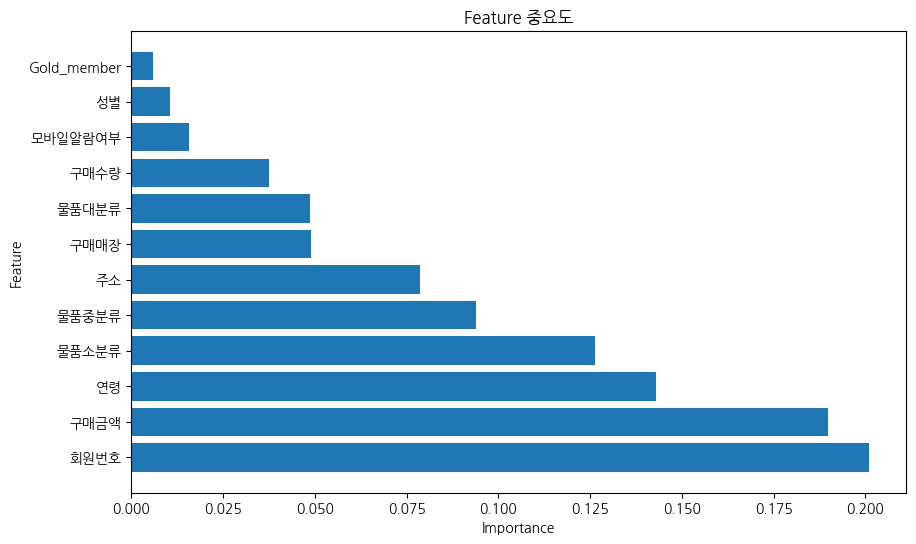

In [79]:
# 피쳐 중요도 얻기
feature_importance = rf_model.feature_importances_

# 피쳐 중요도를 데이터프레임으로 변환
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# 중요도 기준으로 정렬
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance)

# 피쳐 중요도 시각화
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature 중요도')
plt.show()

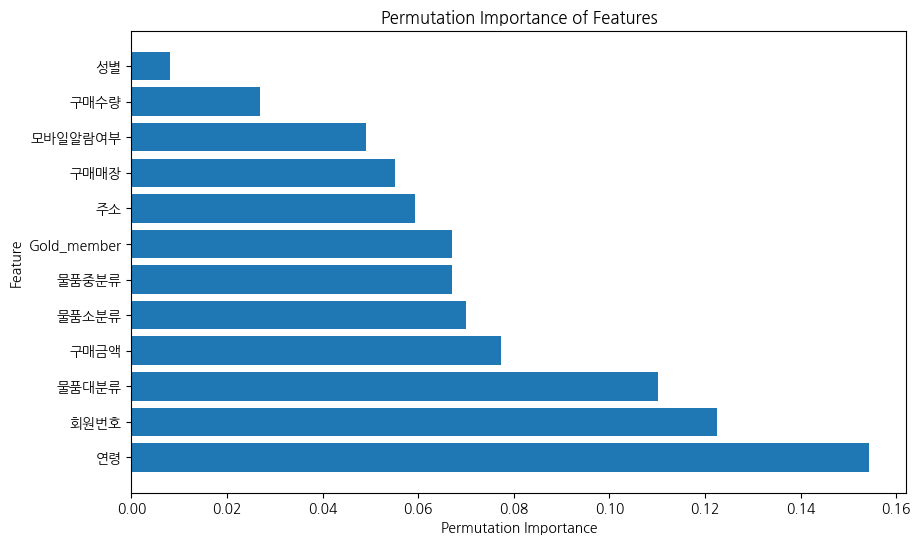

In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

# Permutation importance 계산
perm_importance = permutation_importance(rf_model, test_x, test_y, n_repeats=30, random_state=42)

# 결과 출력
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Permutation_Importance': perm_importance.importances_mean})
feature_importance_df = feature_importance_df.sort_values(by='Permutation_Importance', ascending=False)

# 시각화
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Permutation_Importance'])
plt.xlabel('Permutation Importance')
plt.ylabel('Feature')
plt.title('Permutation Importance of Features')
plt.show()


### OPTUNA 사용해보기

In [66]:
import optuna
from sklearn.model_selection import cross_val_score

def objective(trial):
    # Optuna가 탐색할 하이퍼파라미터 범위 설정
    n_estimators = trial.suggest_int('n_estimators', 50, 500)
    max_depth = trial.suggest_int('max_depth', 3, 20)
    min_samples_split = trial.suggest_float('min_samples_split', 0.1, 1)
    min_samples_leaf = trial.suggest_float('min_samples_leaf', 0.1, 0.5)

    # 랜덤 포레스트 분류 모델 생성
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )

    # SMOTETomek을 사용한 데이터 리샘플링
    sampling_model = SMOTETomek()
    X_resample, Y_resample = sampling_model.fit_resample(X, Y)

    # Cross Validation을 사용하여 모델 평가
    scores = cross_val_score(model, X_resample, Y_resample, n_jobs=-1, cv=5, scoring='accuracy')

    # 정확도의 평균을 최대화하는 것이 목표
    return scores.mean()

# Optuna를 사용하여 최적의 하이퍼파라미터 찾기
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# 최적의 하이퍼파라미터 출력
print('Best trial:')
trial = study.best_trial
print('Accuracy: {}'.format(trial.value))
print('Params: ')
for key, value in trial.params.items():
    print('{}: {}'.format(key, value))

# 최적의 하이퍼파라미터로 모델 재구성
best_params = trial.params
best_rf_model = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    random_state=42
)

# 모델 학습
best_rf_model.fit(train_x, train_y)

# 모델 정확도 평가
y_pred = best_rf_model.predict(test_x)
report_tuned = classification_report(test_y, y_pred)
print(report_tuned)


[I 2024-02-14 16:32:31,892] A new study created in memory with name: no-name-6de4eb6f-c4e2-4ba4-8cfc-46937ef4e7db
[I 2024-02-14 16:32:52,320] Trial 0 finished with value: 0.12898256254738438 and parameters: {'n_estimators': 86, 'max_depth': 16, 'min_samples_split': 0.13785296640557845, 'min_samples_leaf': 0.3176385746996764}. Best is trial 0 with value: 0.12898256254738438.
[I 2024-02-14 16:33:19,585] Trial 1 finished with value: 0.12883109464498058 and parameters: {'n_estimators': 304, 'max_depth': 5, 'min_samples_split': 0.11370334058296717, 'min_samples_leaf': 0.31850077791991616}. Best is trial 0 with value: 0.12898256254738438.
[I 2024-02-14 16:33:47,913] Trial 2 finished with value: 0.14366279759201256 and parameters: {'n_estimators': 248, 'max_depth': 16, 'min_samples_split': 0.25713597285711265, 'min_samples_leaf': 0.26563208389115883}. Best is trial 2 with value: 0.14366279759201256.
[I 2024-02-14 16:34:15,613] Trial 3 finished with value: 0.1293135897949324 and parameters: {'

Best trial:
Accuracy: 0.16882970334005637
Params: 
n_estimators: 287
max_depth: 10
min_samples_split: 0.16368455467917395
min_samples_leaf: 0.10071976396030027
              precision    recall  f1-score   support

           0       0.09      0.00      0.01     10417
           1       0.15      0.22      0.18     10354
           2       0.18      0.34      0.23     10411
           3       0.20      0.42      0.27     10441
           4       0.19      0.08      0.11      9973
           5       0.17      0.23      0.19      9944
           6       0.19      0.10      0.13     10272
           7       0.18      0.03      0.04     10423

    accuracy                           0.18     82235
   macro avg       0.17      0.18      0.15     82235
weighted avg       0.17      0.18      0.15     82235



#

In [ ]:
df5.to_csv('mini1.csv', index=False)

In [ ]:
X = df5.drop('구매시점', axis=1)
y = df5['구매시점']

# 
label_encoder = LabelEncoder()
X['혈액형'] = label_encoder.fit_transform(X['혈액형'])
X['직업'] = label_encoder.fit_transform(X['직업'])


# 선형회귀 모델
linear_model = LinearRegression()
linear_model.fit(X, y)

# 랜덤 포레스트 분류 모델
rf_model = RandomForestClassifier()
rf_model.fit(X, y)

# 모델 정확도 평가 (랜덤 포레스트의 경우)
# 예측값
y_pred = rf_model.predict(X)

# 정확도 출력
accuracy_score(y, y_pred)



## 2) 구독서비스 (온라인 시점) : 개인별 구매 패턴(성향) 분석
개인별 구매 패턴을 확인한 다음 주기적으로 사는 사람들에게 

시간대로 쓸 수 있는지? : 현재 배송하고 있는 사람들의 특정시간대 확인, 고령자끼리 

**y평균방문주기(일) , x 반품신청여부/구매수량/지역/구매금액/ 성별  *신선식품 = 일  —> 알림**

### 평균방문주기 파생변수 생성

In [125]:
df5

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,공급일자,물품대분류,...,구매금액,구매매장,반품_원거래일자,구매시각,요일,시각,주말여부,시간대,구매시점,반품여부
0,1000012800,정상회원,수지구-풍덕천동,여,58.0,미신청,.,normal,2022-06-13,반찬,...,7658,매장B,NaN,16:11,0,16,평일,낮2,평일낮2,0
1,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,...,5743,매장C,NaN,13:27,2,13,평일,낮1,평일낮1,0
2,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,...,4786,매장C,NaN,13:27,2,13,평일,낮1,평일낮1,0
3,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,...,7083,매장C,NaN,13:27,2,13,평일,낮1,평일낮1,0
4,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,...,3829,매장C,NaN,13:27,2,13,평일,낮1,평일낮1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294640,99995712,정상회원,수지구-상현동,여,66.0,미신청,.,normal,2022-10-08,축산물,...,27759,매장B,NaN,13:29,5,13,주말,낮1,주말낮1,0
294641,99995712,정상회원,수지구-상현동,여,66.0,미신청,.,normal,2022-10-16,서류,...,6700,매장B,NaN,17:45,6,17,주말,낮2,주말낮2,0
294642,99995712,정상회원,수지구-상현동,여,66.0,미신청,.,normal,2022-10-24,간식,...,5360,매장B,NaN,10:06,0,10,평일,오전,평일오전,0
294643,99995712,정상회원,수지구-상현동,여,66.0,미신청,.,normal,2022-10-24,채소,...,4212,매장B,NaN,10:06,0,10,평일,오전,평일오전,0


In [126]:
df5['회원번호'].unique()

array([1000012800, 1000103744, 1000122304, ...,  999721408,  999738112,
         99995712])

In [133]:
# 회원별로 방문 주기 계산
df5_sorted = df5.sort_values(['회원번호', '공급일자'])
df5_sorted['평균방문주기'] = df5_sorted.groupby('회원번호')['공급일자'].diff().dt.days

# 각 회원의 평균 방문 주기 계산
average_visit_period = df5_sorted.groupby('회원번호')['평균방문주기'].mean().reset_index()

# '평균방문주기' 열 추가
df5 = df5.merge(average_visit_period, on='회원번호', how='left')
df5

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,공급일자,물품대분류,...,구매매장,반품_원거래일자,구매시각,요일,시각,주말여부,시간대,구매시점,반품여부,평균방문주기
0,1000012800,정상회원,수지구-풍덕천동,여,58.0,미신청,.,normal,2022-06-13,반찬,...,매장B,NaN,16:11,0,16,평일,낮2,평일낮2,0,NaN
1,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,...,매장C,NaN,13:27,2,13,평일,낮1,평일낮1,0,0.000000
2,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,...,매장C,NaN,13:27,2,13,평일,낮1,평일낮1,0,0.000000
3,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,...,매장C,NaN,13:27,2,13,평일,낮1,평일낮1,0,0.000000
4,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,...,매장C,NaN,13:27,2,13,평일,낮1,평일낮1,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217764,99995712,정상회원,수지구-상현동,여,66.0,미신청,.,normal,2022-10-08,축산물,...,매장B,NaN,13:29,5,13,주말,낮1,주말낮1,0,3.157303
217765,99995712,정상회원,수지구-상현동,여,66.0,미신청,.,normal,2022-10-16,서류,...,매장B,NaN,17:45,6,17,주말,낮2,주말낮2,0,3.157303
217766,99995712,정상회원,수지구-상현동,여,66.0,미신청,.,normal,2022-10-24,간식,...,매장B,NaN,10:06,0,10,평일,오전,평일오전,0,3.157303
217767,99995712,정상회원,수지구-상현동,여,66.0,미신청,.,normal,2022-10-24,채소,...,매장B,NaN,10:06,0,10,평일,오전,평일오전,0,3.157303


In [135]:
df5['평균방문주기'].fillna(0, inplace=True)
df5

/var/folders/m3/5c3zp5d91518bml26ndk894w0000gn/T/ipykernel_9160/2397389171.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df5['평균방문주기'].fillna(0, inplace=True)


,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,공급일자,물품대분류,...,구매매장,반품_원거래일자,구매시각,요일,시각,주말여부,시간대,구매시점,반품여부,평균방문주기
0,1000012800,정상회원,수지구-풍덕천동,여,58.0,미신청,.,normal,2022-06-13,반찬,...,매장B,NaN,16:11,0,16,평일,낮2,평일낮2,0,0.000000
1,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,...,매장C,NaN,13:27,2,13,평일,낮1,평일낮1,0,0.000000
2,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,...,매장C,NaN,13:27,2,13,평일,낮1,평일낮1,0,0.000000
3,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,...,매장C,NaN,13:27,2,13,평일,낮1,평일낮1,0,0.000000
4,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2022-10-12,간식,...,매장C,NaN,13:27,2,13,평일,낮1,평일낮1,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217764,99995712,정상회원,수지구-상현동,여,66.0,미신청,.,normal,2022-10-08,축산물,...,매장B,NaN,13:29,5,13,주말,낮1,주말낮1,0,3.157303
217765,99995712,정상회원,수지구-상현동,여,66.0,미신청,.,normal,2022-10-16,서류,...,매장B,NaN,17:45,6,17,주말,낮2,주말낮2,0,3.157303
217766,99995712,정상회원,수지구-상현동,여,66.0,미신청,.,normal,2022-10-24,간식,...,매장B,NaN,10:06,0,10,평일,오전,평일오전,0,3.157303
217767,99995712,정상회원,수지구-상현동,여,66.0,미신청,.,normal,2022-10-24,채소,...,매장B,NaN,10:06,0,10,평일,오전,평일오전,0,3.157303


In [136]:
df5['평균방문주기'].value_counts()

평균방문주기
0.000000      4257
0.223043      1355
0.716667       842
0.926154       652
0.529825       571
              ... 
263.000000       2
183.000000       2
208.000000       2
255.000000       2
202.000000       2
Name: count, Length: 3547, dtype: int64

### 랜덤포레스트

In [137]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217769 entries, 0 to 217768
Data columns (total 25 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   회원번호         217769 non-null  int64         
 1   조합원상태        217769 non-null  object        
 2   주소           217769 non-null  object        
 3   성별           217768 non-null  object        
 4   연령           217769 non-null  float64       
 5   배송서비스신청여부    217769 non-null  object        
 6   모바일알람여부      217769 non-null  object        
 7   Gold_member  217769 non-null  object        
 8   공급일자         217769 non-null  datetime64[ns]
 9   물품대분류        217769 non-null  object        
 10  물품중분류        217769 non-null  object        
 11  물품소분류        217769 non-null  object        
 12  물품명          217769 non-null  object        
 13  구매수량         217769 non-null  float64       
 14  구매금액         217769 non-null  int64         
 15  구매매장         217769 non-null  obje

In [138]:
X = df5.drop(['물품명','반품_원거래일자', '구매시각','주말여부','시간대'], axis=1)
Y = df5['평균방문주기']
#제거 : 물품명, 반품_원거래일자, 구매시각, 요일, 주말여부, 시간대
# 조합원상태, 주소, 성별, Gold_member, 물품대분류, 물품중분류, 물품소분류, 구매매장, 반품여부  //구매시점
label_encoder = LabelEncoder()
X['주소'] = label_encoder.fit_transform(X['주소'])
X['성별'] = label_encoder.fit_transform(X['성별'])
X['Gold_member'] = label_encoder.fit_transform(X['Gold_member'])
X['물품대분류'] = label_encoder.fit_transform(X['물품대분류'])
X['물품중분류'] = label_encoder.fit_transform(X['물품중분류'])
X['물품소분류'] = label_encoder.fit_transform(X['물품소분류'])
X['구매매장'] = label_encoder.fit_transform(X['구매매장'])
X['구매시점'] = label_encoder.fit_transform(X['구매시점'])
X['모바일알람여부'] = label_encoder.fit_transform(X['모바일알람여부'])
X['배송서비스신청여부'] = label_encoder.fit_transform(X['배송서비스신청여부'])




In [146]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# SMOTE 오버샘플링 수행
smote = SMOTE()
X_resample, Y_resample = smote.fit_resample(X, Y)

# 나머지 코드는 동일
X_resample = X_resample.to_numpy()
Y_resample = Y_resample.to_numpy()

train_x, test_x, train_y, test_y = train_test_split(X_resample, Y_resample)

# 랜덤 포레스트 회귀 모델
rf_model = RandomForestRegressor()
rf_model.fit(train_x, train_y)

# 모델 예측
y_pred = rf_model.predict(test_x)

# 평균제곱오차 계산
mse = mean_squared_error(test_y, y_pred)
print(f'Mean Squared Error: {mse}')


ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [ ]:
# 랜덤 포레스트 분류 모델
rf_model = RandomForestClassifier()
rf_model.fit(train_x, train_y)

# 모델 정확도 평가 (랜덤 포레스트의 경우)
# 예측값
y_pred = rf_model.predict(test_x)

report_tuned = classification_report(test_y, y_pred)
print(report_tuned)

In [ ]:
# 피쳐 중요도 얻기
feature_importance = rf_model.feature_importances_

# 피쳐 중요도를 데이터프레임으로 변환
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# 중요도 기준으로 정렬
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance)

# 피쳐 중요도 시각화
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature 중요도')
plt.show()

In [141]:
from imblearn.over_sampling import SMOTERegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# 독립 변수와 종속 변수 설정
X = df5.drop(['물품명', '반품_원거래일자', '구매시각', '주말여부', '시간대', '평균방문주기'], axis=1)
Y = df5['평균방문주기']

# 레이블 인코딩
label_encoder = LabelEncoder()
X['주소'] = label_encoder.fit_transform(X['주소'])
X['성별'] = label_encoder.fit_transform(X['성별'])
X['Gold_member'] = label_encoder.fit_transform(X['Gold_member'])
X['물품대분류'] = label_encoder.fit_transform(X['물품대분류'])
X['물품중분류'] = label_encoder.fit_transform(X['물품중분류'])
X['물품소분류'] = label_encoder.fit_transform(X['물품소분류'])
X['구매매장'] = label_encoder.fit_transform(X['구매매장'])
X['구매시점'] = label_encoder.fit_transform(X['구매시점'])
X['모바일알람여부'] = label_encoder.fit_transform(X['모바일알람여부'])
X['배송서비스신청여부'] = label_encoder.fit_transform(X['배송서비스신청여부'])

# 오버샘플링(SMOTERegressor) 수행
smote_regressor = SMOTERegressor()
X_resample, Y_resample = smote_regressor.fit_resample(X, Y)

# 나머지 코드는 동일
X_resample = X_resample.to_numpy()
Y_resample = Y_resample.to_numpy()

train_x, test_x, train_y, test_y = train_test_split(X_resample, Y_resample)


ImportError: cannot import name 'SMOTERegressor' from 'imblearn.over_sampling' (/Users/hanadoolsae/opt/anaconda3/envs/tf2.0/lib/python3.12/site-packages/imblearn/over_sampling/__init__.py)

In [155]:
# 원핫인코딩 적용
df5_encoded = pd.get_dummies(df5, columns=['조합원상태', '주소','성별','물품대분류', '배송서비스신청여부','모바일알람여부','물품중분류', '물품소분류', '구매매장','구매시점','Gold_member', '반품여부'], drop_first=True)

# 불필요한 열 제거
df5_encoded = df5_encoded.drop(['물품명', '반품_원거래일자', '구매시각', '공급일자', '요일', '주말여부','시간대'], axis=1)


In [156]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 독립변수(X)와 종속변수(Y) 분리
X = df5_encoded.drop('평균방문주기', axis=1)
Y = df5_encoded['평균방문주기']

# 학습 데이터와 테스트 데이터 분리
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state=42)

# 선형 회귀 모델 학습
regressor = LinearRegression()
regressor.fit(train_x, train_y)

# 테스트 데이터에 대한 예측
pred_y = regressor.predict(test_x)




Mean Squared Error: 118.98541112342896


In [157]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error

# 평균제곱오차 계산
mse = mean_squared_error(test_y, pred_y)
print(f"Mean Squared Error: {mse}")

# R-squared 계산
r_squared = r2_score(test_y, pred_y)
print(f"R-squared: {r_squared}")

# MAE 계산
mae = mean_absolute_error(test_y, pred_y)
print(f"Mean Absolute Error: {mae}")

# MAPE 계산
mape = mean_absolute_percentage_error(test_y, pred_y)
print(f"Mean Absolute Percentage Error: {mape}")

# RMSE 계산
rmse = mean_squared_error(test_y, pred_y, squared=False)
print(f"Root Mean Squared Error: {rmse}")


Mean Squared Error: 118.98541112342896
R-squared: 0.1277936290902567
Mean Absolute Error: 5.374264080128417
Mean Absolute Percentage Error: 964356372350541.6
Root Mean Squared Error: 10.908043414078849
